In [39]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image 

In [24]:
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1/255)


In [25]:
train_dir = "C:\\Users\\SWATHY KRISHNA\\Downloads\\training_set\\training_set"
test_dir = "C:\\Users\\SWATHY KRISHNA\\Downloads\\test_set\\test_set"


In [26]:
img_width,img_height=150,150

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode="binary"
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(img_width,img_height,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))  # Updated this line to match the flattened output size
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))


In [29]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
print("Model summary:")
model.summary()


Model summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128

In [31]:
history=model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
251/251 [==============================] - 457s 2s/step - loss: 0.6990 - accuracy: 0.5854 - val_loss: 0.6409 - val_accuracy: 0.6560
Epoch 2/10
251/251 [==============================] - 227s 903ms/step - loss: 0.6398 - accuracy: 0.6396 - val_loss: 0.6046 - val_accuracy: 0.7004
Epoch 3/10
251/251 [==============================] - 218s 868ms/step - loss: 0.6020 - accuracy: 0.6854 - val_loss: 0.5804 - val_accuracy: 0.7014
Epoch 4/10
251/251 [==============================] - 219s 873ms/step - loss: 0.5786 - accuracy: 0.6951 - val_loss: 0.5598 - val_accuracy: 0.7276
Epoch 5/10
251/251 [==============================] - 218s 868ms/step - loss: 0.5453 - accuracy: 0.7250 - val_loss: 0.5543 - val_accuracy: 0.7222
Epoch 6/10
251/251 [==============================] - 211s 839ms/step - loss: 0.5165 - accuracy: 0.7487 - val_loss: 0.5371 - val_accuracy: 0.7464
Epoch 7/10
251/251 [==============================] - 214s 851ms/step - loss: 0.4926 - accuracy: 0.7644 - val_loss: 0.5340 - va

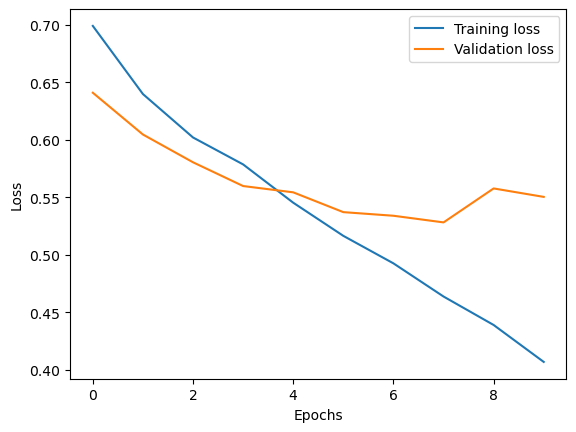

In [32]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

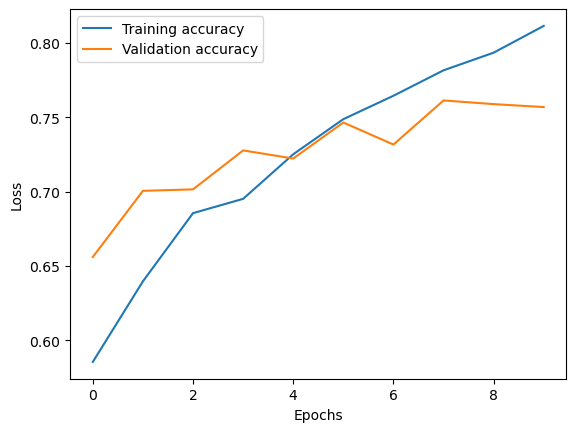

In [33]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
def predict(index, model, validation_generator, classes):
    # Display the image
    plt.figure(figsize=(1, 1))
    img_path = validation_generator.filepaths[index]  # Get the image path from generator
    img = image.load_img(img_path, target_size=(150, 150))  # Load and resize the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image for prediction
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    pred_prob = model.predict(img)
    pred_class = int(np.round(pred_prob)[0][0])  # Convert predicted probability to class

    # Print original and predicted classes
    original_class = classes[int(validation_generator.classes[index])]
    predicted_class = classes[pred_class]
    print('Original Class:', original_class)
    print('Predicted Class:', predicted_class)


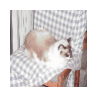

1/1 [==============================] - 3s 3s/step
Original Class: Class 0
Predicted Class: Class 0


In [40]:
index_to_predict = 10  # Index of the image in validation_generator to predict
predict(index_to_predict, model, validation_generator, {0: 'Class 0', 1: 'Class 1'})

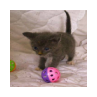

1/1 [==============================] - 0s 75ms/step
Original Class: Class 0
Predicted Class: Class 0


In [43]:
index_to_predict = 100  # Index of the image in validation_generator to predict
predict(index_to_predict, model, validation_generator, {0: 'Class 0', 1: 'Class 1'})